# 🧠 Resolviendo el problema XOR con Redes Neuronales Feedforward (MLP)
En esta sesión, abordamos el desafío clásico del problema **XOR**, un caso simple pero fundamental para entender las **limitaciones de los modelos lineales** y la necesidad de arquitecturas más complejas como las **redes neuronales multicapa** (MLP).

In [ ]:
!pip install torch matplotlib --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 104.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 69.9 MB/s eta 0:00:00


#🔹 Paso 1: Comprendiendo el Problema XOR
Iniciamos revisando el conjunto de datos XOR, cuyas salidas no pueden ser separadas con una sola línea recta. Esto nos permitió **identificar las limitaciones de un perceptrón simple**, que al ser un modelo lineal, no logra representar funciones no lineales como XOR.

In [ ]:
import torch

X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])

y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# 🔹 Paso 2: Implementación y Visualización del Perceptrón
Entrenamos un **perceptrón simple** usando PyTorch y visualizamos su **frontera de decisión**. Esto demostró gráficamente que el modelo no puede separar correctamente los puntos, reafirmando que **el problema XOR no es linealmente separable**.

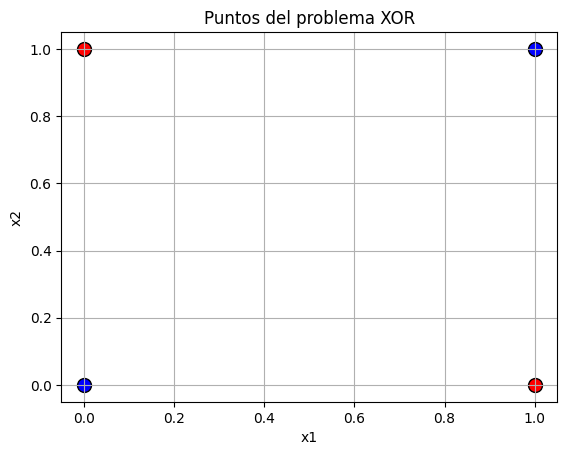

In [ ]:
import matplotlib.pyplot as plt

def plot_xor_data(X, y):
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X)):
        plt.scatter(X_np[i, 0], X_np[i, 1],
                    c='red' if y_np[i] == 1 else 'blue',
                    s=100, edgecolors='k')
    plt.title("Puntos del problema XOR")
    plt.grid(True)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

plot_xor_data(X, y)


In [ ]:
import torch.nn as nn
import torch.optim as optim
import numpy as np

class Perceptron(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(2, 1)
        self.activation = nn.Sigmoid()
    def forward(self, x):
        return self.activation(self.linear(x))

perceptron = Perceptron()
criterion = nn.BCELoss()
optimizer = optim.SGD(perceptron.parameters(), lr=0.1)

losses = []
for epoch in range(10000):
    output = perceptron(X)
    loss = criterion(output, y)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


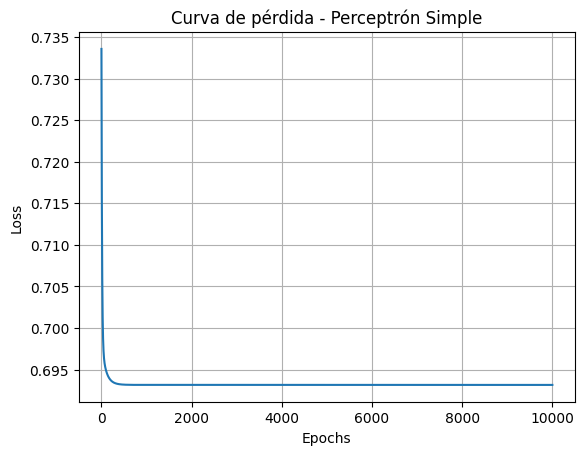

In [ ]:
plt.plot(losses)
plt.title("Curva de pérdida - Perceptrón Simple")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


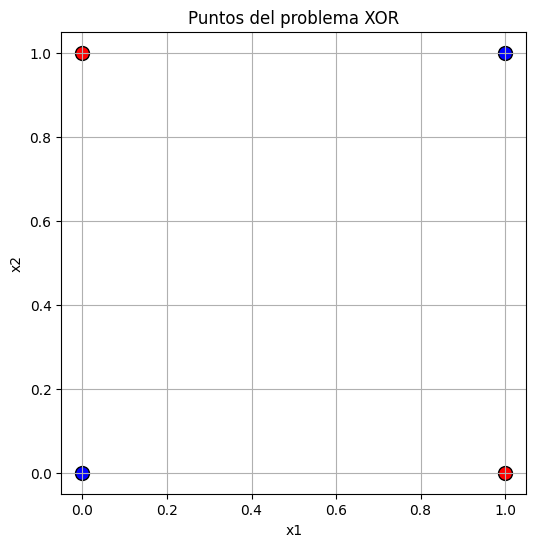

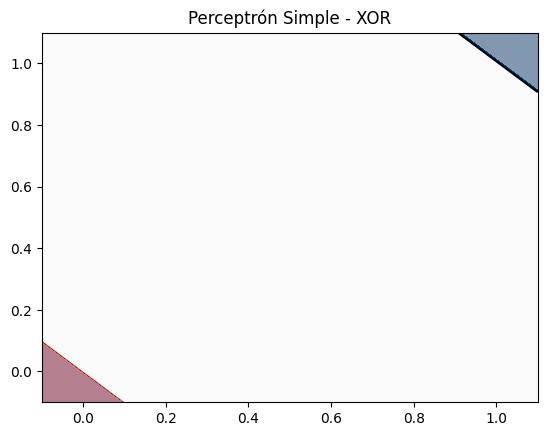

In [ ]:
def plot_decision_boundary(model, X, y, title="Frontera de decisión"):
    x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                         np.linspace(-0.1, 1.1, 200))
    grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape)

    plt.figure(figsize=(6, 6))
    plot_xor_data(X, y)
    plt.contourf(x1, x2, preds, levels=100, cmap="RdBu", alpha=0.5)
    plt.contour(x1, x2, preds, levels=[0.5], colors="black", linewidths=1.5)
    plt.title(title)
    plt.show()

plot_decision_boundary(perceptron, X, y, title="Perceptrón Simple - XOR")


#🔹 Paso 3: Introducción a la Red MLP
Construimos una **red neuronal feedforward con una capa oculta**, también conocida como MLP (Multilayer Perceptron). Discutimos su **arquitectura interna**, comprendiendo el rol de:

* **Capas de entrada, ocultas y salida**

* **Funciones de activación no lineales** como `Tanh` y `Sigmoid`

* **Flujo de información** desde `x → h → y`

#🔹 Paso 4: Entrenamiento de la MLP
Entrenamos la red MLP sobre el problema XOR y observamos cómo la función de pérdida disminuye de forma significativa, evidenciando el aprendizaje del modelo. Se aplicó **descenso de gradiente estocástico** junto con **retropropagación** para ajustar los pesos de manera eficiente.

In [ ]:
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

mlp = XORMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(mlp.parameters(), lr=0.1)

mlp_losses = []
for epoch in range(10000):
    output = mlp(X)
    loss = criterion(output, y)
    mlp_losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


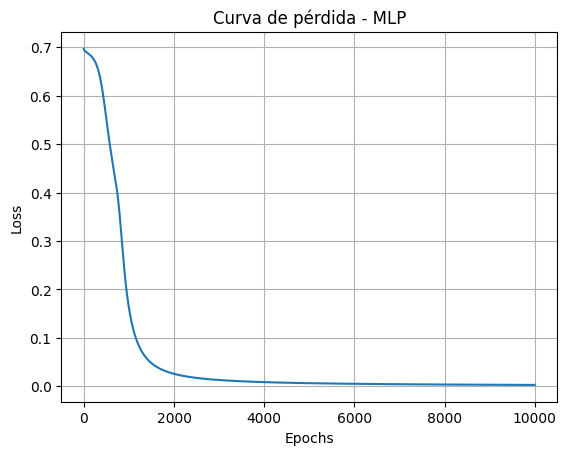

In [ ]:
plt.plot(mlp_losses)
plt.title("Curva de pérdida - MLP")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


#🔹 Paso 5: Visualización del Aprendizaje
Visualizamos:

* La **frontera de decisión no lineal** generada por la MLP, que ahora separa correctamente las clases

* La **curva de pérdida** durante el entrenamiento

* Las **funciones de activación** usadas y sus propiedades

* La **distribución de gradientes**, para entender cómo fluye la información de aprendizaje

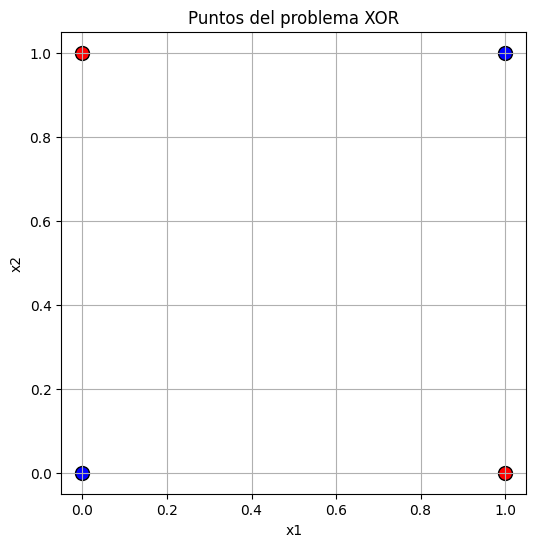

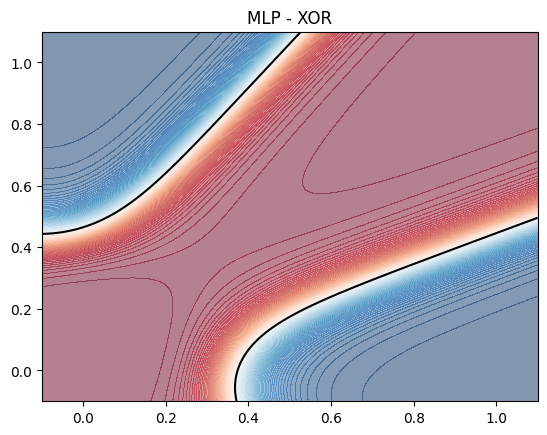

In [ ]:
plot_decision_boundary(mlp, X, y, title="MLP - XOR")


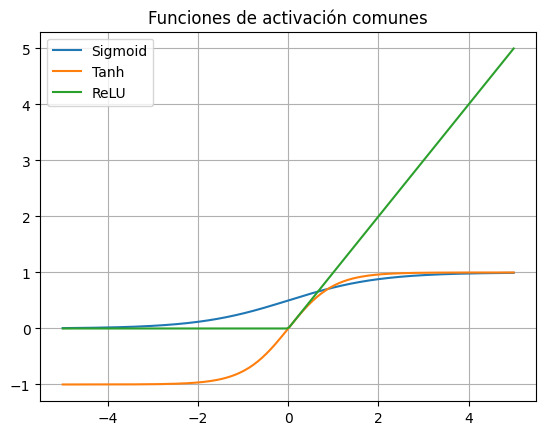

In [ ]:
x_vals = np.linspace(-5, 5, 200)
plt.plot(x_vals, 1 / (1 + np.exp(-x_vals)), label="Sigmoid")
plt.plot(x_vals, np.tanh(x_vals), label="Tanh")
plt.plot(x_vals, np.maximum(0, x_vals), label="ReLU")
plt.legend()
plt.title("Funciones de activación comunes")
plt.grid(True)
plt.show()


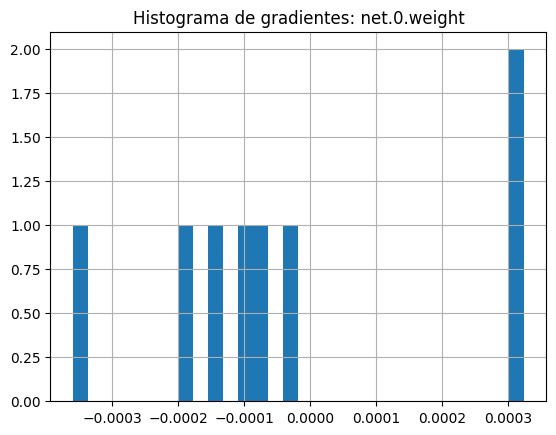

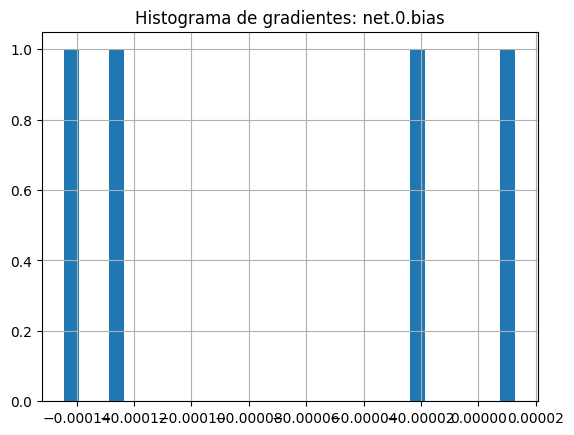

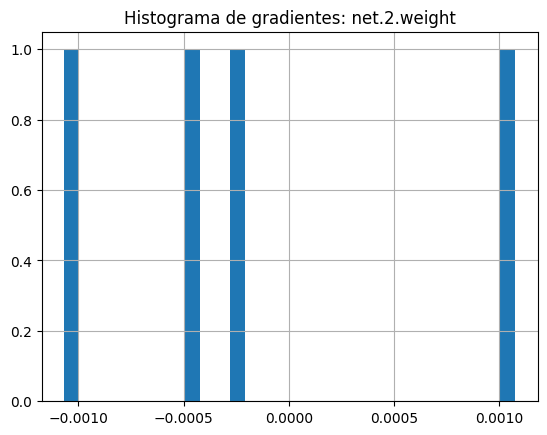

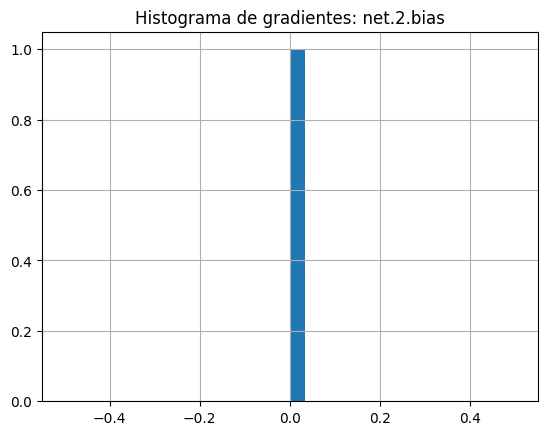

In [ ]:
def plot_gradients(model):
    for name, param in model.named_parameters():
        if param.grad is not None:
            plt.hist(param.grad.numpy().flatten(), bins=30)
            plt.title(f"Histograma de gradientes: {name}")
            plt.grid(True)
            plt.show()

# Ejecutar al final del último entrenamiento
plot_gradients(mlp)


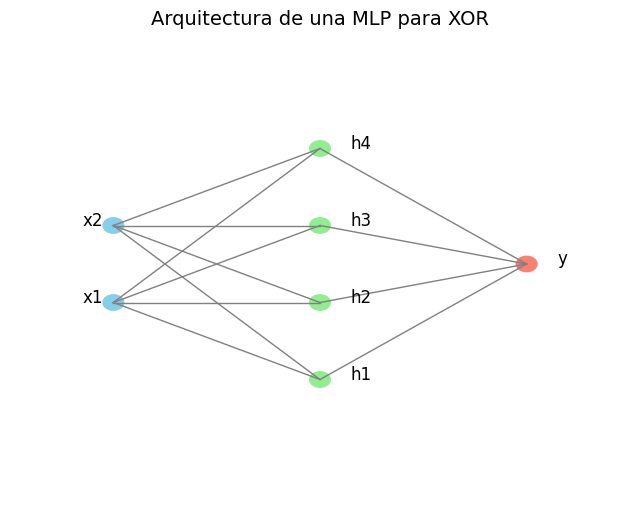

In [ ]:
import matplotlib.pyplot as plt

def draw_mlp_architecture(input_size=2, hidden_size=4, output_size=1):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.axis('off')

    # Posiciones verticales
    layer_y = [0, 2, 4]  # Entrada, Oculta, Salida
    node_radius = 0.1

    # Entradas
    for i in range(input_size):
        ax.add_patch(plt.Circle((0, i - input_size/2 + 0.5), node_radius, fill=True, color='skyblue'))
        ax.text(-0.3, i - input_size/2 + 0.5, f'x{i+1}', fontsize=12)

    # Capa oculta
    for i in range(hidden_size):
        ax.add_patch(plt.Circle((2, i - hidden_size/2 + 0.5), node_radius, fill=True, color='lightgreen'))
        ax.text(2.3, i - hidden_size/2 + 0.5, f'h{i+1}', fontsize=12)

    # Salida
    for i in range(output_size):
        ax.add_patch(plt.Circle((4, 0), node_radius, fill=True, color='salmon'))
        ax.text(4.3, 0, f'y', fontsize=12)

    # Conexiones entrada → oculta
    for i in range(input_size):
        for j in range(hidden_size):
            ax.plot([0, 2],
                    [i - input_size/2 + 0.5, j - hidden_size/2 + 0.5],
                    'gray', linewidth=1)

    # Conexiones oculta → salida
    for j in range(hidden_size):
        ax.plot([2, 4],
                [j - hidden_size/2 + 0.5, 0],
                'gray', linewidth=1)

    ax.set_xlim(-1, 5)
    ax.set_ylim(-3, 3)
    ax.set_title("Arquitectura de una MLP para XOR", fontsize=14)
    plt.show()

draw_mlp_architecture()


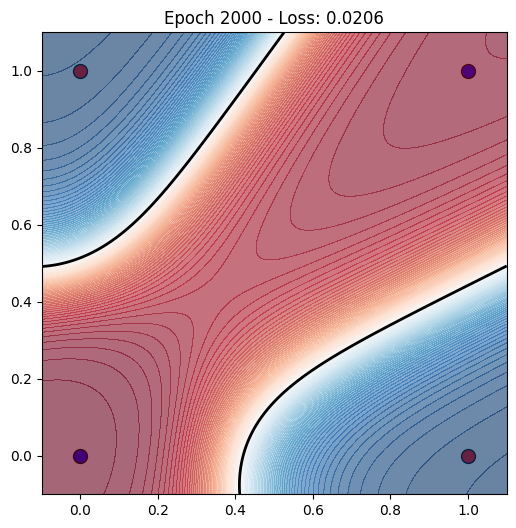

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Dataset XOR
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Definición de la MLP
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = XORMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Preparar malla para frontera
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                     np.linspace(-0.1, 1.1, 200))
grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

fig, ax = plt.subplots(figsize=(6,6))

def plot_data():
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X_np)):
        ax.scatter(X_np[i, 0], X_np[i, 1],
                   c='red' if y_np[i]==1 else 'blue',
                   s=100, edgecolors='k')

plot_data()
contourf = None

epochs = 2000
interval = 50  # ms entre frames

def update(epoch):
    global contourf
    for coll in ax.collections:
        coll.remove()
    plot_data()

    # Entrenamiento 1 paso (epoch)
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    # Predicción para malla
    model.eval()
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape).numpy()

    # Dibujar frontera
    contourf = ax.contourf(x1, x2, preds, levels=100, cmap='RdBu', alpha=0.6)
    ax.contour(x1, x2, preds, levels=[0.5], colors='black', linewidths=2)

    ax.set_title(f"Epoch {epoch+1} - Loss: {loss.item():.4f}")
    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)

ani = FuncAnimation(fig, update, frames=epochs, interval=interval, repeat=False)

# Guardar animación como GIF (recomendado que lo hagas con pocos epochs para que no pese mucho)
ani.save('xor_training.gif', writer=PillowWriter(fps=20))

plt.show()


# Entrenamiento de XOR_MLP
* Grafica de límites de decisión
* Gráfica la funcion de perida

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Dataset XOR
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Definición de la MLP
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = XORMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Preparar malla para frontera
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                     np.linspace(-0.1, 1.1, 200))
grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

losses = []

def plot_data(ax):
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X_np)):
        ax.scatter(X_np[i, 0], X_np[i, 1],
                   c='red' if y_np[i]==1 else 'blue',
                   s=100, edgecolors='k')

def update(epoch):
    global contourf
    # Limpiar colecciones previas en ax1
    for coll in ax1.collections:
        coll.remove()
    ax1.cla()
    plot_data(ax1)

    # Entrenamiento 1 paso (epoch)
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Predicción para malla
    model.eval()
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape).numpy()

    # Dibujar frontera en ax1
    contourf = ax1.contourf(x1, x2, preds, levels=100, cmap='RdBu', alpha=0.6)
    ax1.contour(x1, x2, preds, levels=[0.5], colors='black', linewidths=2)
    plot_data(ax1)
    ax1.set_title(f"Epoch {epoch+1} - Frontera de Decisión")
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(-0.1, 1.1)

    # Actualizar curva de pérdida en ax2
    ax2.cla()
    ax2.plot(losses, color='purple')
    ax2.set_title("Curva de pérdida")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(losses) * 1.1)
    ax2.grid(True)

epochs = 2000
interval = 50  # ms entre frames

ani = FuncAnimation(fig, update, frames=epochs, interval=interval, repeat=False)

# Guardar animación como GIF
ani.save('xor_training_with_loss.gif', writer=PillowWriter(fps=20))

plt.show()


# Entrenamiento de XOR_MLP
* Gráfica de límites de decisión
* Gráfica la funcion de perida
* Histograma de gradientes

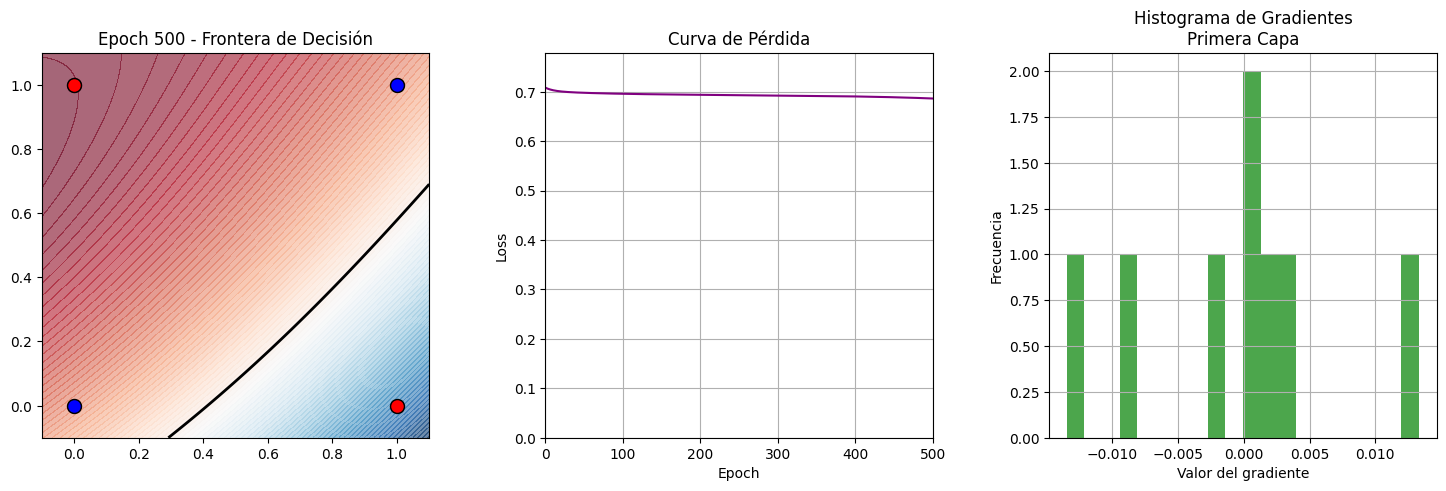

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Dataset XOR
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Definición de la MLP
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 1),
            nn.Sigmoid()
        )
    def forward(self, x):
        return self.net(x)

model = XORMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Preparar malla para frontera
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                     np.linspace(-0.1, 1.1, 200))
grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.3)  # espacio horizontal entre gráficos

losses = []

def plot_data(ax):
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X_np)):
        ax.scatter(X_np[i, 0], X_np[i, 1],
                   c='red' if y_np[i]==1 else 'blue',
                   s=100, edgecolors='k')

def update(epoch):
    global contourf
    # --- Frontera de decisión ---
    for coll in ax1.collections:
        coll.remove()
    ax1.cla()
    plot_data(ax1)

    # Entrenamiento 1 paso (epoch)
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    # Predicción para malla
    model.eval()
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape).numpy()

    contourf = ax1.contourf(x1, x2, preds, levels=100, cmap='RdBu', alpha=0.6)
    ax1.contour(x1, x2, preds, levels=[0.5], colors='black', linewidths=2)
    plot_data(ax1)
    ax1.set_title(f"Epoch {epoch+1} - Frontera de Decisión")
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(-0.1, 1.1)

    # --- Curva de pérdida ---
    ax2.cla()
    ax2.plot(losses, color='purple')
    ax2.set_title("Curva de Pérdida")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(losses)*1.1)
    ax2.grid(True)

    # --- Histograma de gradientes primera capa ---
    ax3.cla()
    grads = model.net[0].weight.grad
    if grads is not None:
        ax3.hist(grads.cpu().numpy().flatten(), bins=20, color='green', alpha=0.7)
    ax3.set_title("Histograma de Gradientes\nPrimera Capa")
    ax3.set_xlabel("Valor del gradiente")
    ax3.set_ylabel("Frecuencia")
    ax3.grid(True)

# epochs = 2000
#interval = 50  # ms entre frames

epochs = 500
interval = 30  # ms entre frames, puedes ajustar a gusto

ani = FuncAnimation(fig, update, frames=epochs, interval=interval, repeat=False)

# Guardar GIF (puedes reducir epochs para archivo más liviano)
ani.save('xor_training_full.gif', writer=PillowWriter(fps=20))

plt.show()


* Ver cómo evoluciona la representación interna del modelo mientras aprende a resolver XOR.

GIF animado con:

* Frontera de decisión
* Curva de pérdida
* Visualización
 de funciones de Activación (pre/post Tanh) de la capa oculta

  * 🟡 Activaciones pre-Tanh (z): salidas lineales de la primera capa.

  * 🟢 Activaciones post-Tanh (a): después de aplicar la función de activación.

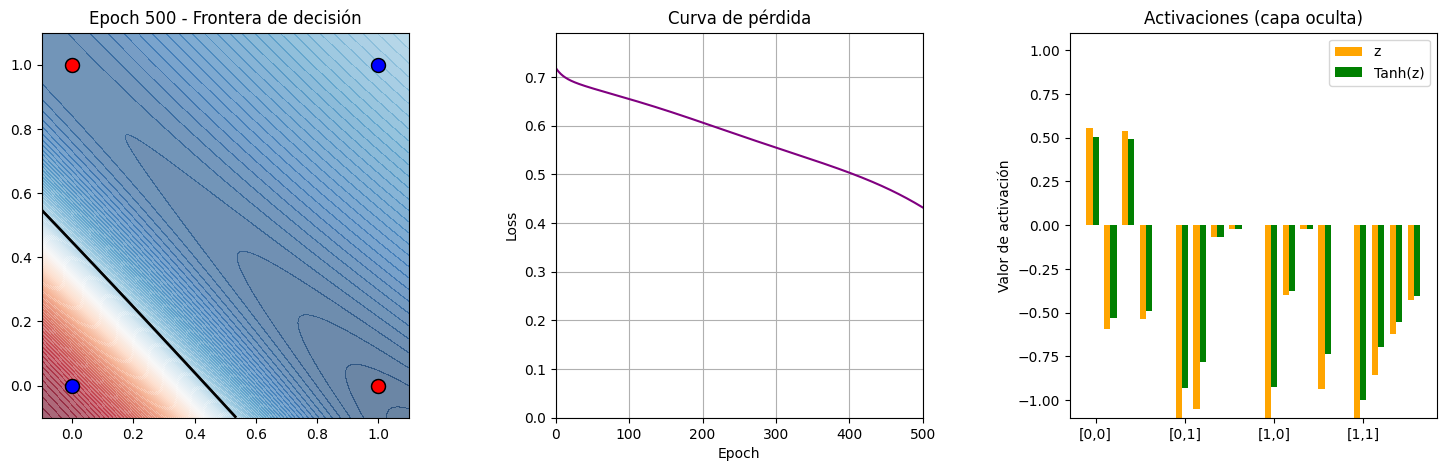

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Dataset XOR
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Definición de la MLP
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),  # Capa oculta
            nn.Tanh(),        # Activación oculta
            nn.Linear(4, 1),  # Capa salida
            nn.Sigmoid()      # Activación salida
        )
    def forward(self, x):
        return self.net(x)

model = XORMLP()
criterion = nn.BCELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Malla para visualizar frontera
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                     np.linspace(-0.1, 1.1, 200))
grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

# Figura: 3 subplots horizontales
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.4)

losses = []

def plot_data(ax):
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X_np)):
        ax.scatter(X_np[i, 0], X_np[i, 1],
                   c='red' if y_np[i]==1 else 'blue',
                   s=100, edgecolors='k')

# Animación
def update(epoch):
    # Frontera de decisión
    for coll in ax1.collections:
        coll.remove()
    ax1.cla()
    plot_data(ax1)

    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    # Predicción en la malla
    model.eval()
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape).numpy()

    # Actualizar ax1
    ax1.contourf(x1, x2, preds, levels=100, cmap='RdBu', alpha=0.6)
    ax1.contour(x1, x2, preds, levels=[0.5], colors='black', linewidths=2)
    plot_data(ax1)
    ax1.set_title(f"Epoch {epoch+1} - Frontera de decisión")
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(-0.1, 1.1)

    # Curva de pérdida
    ax2.cla()
    ax2.plot(losses, color='purple')
    ax2.set_title("Curva de pérdida")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(losses)*1.1)
    ax2.grid(True)

    # Activaciones de la capa oculta
    ax3.cla()
    ax3.set_title("Activaciones (capa oculta)")
    linear = model.net[0]  # Primer Linear
    with torch.no_grad():
        z = linear(X)          # Antes de Tanh
        a = torch.tanh(z)      # Después de Tanh

    x_labels = ['[0,0]', '[0,1]', '[1,0]', '[1,1]']
    width = 0.35
    num_neurons = z.shape[1]

    for i in range(len(X)):
        x = np.arange(num_neurons)
        ax3.bar(x + i * (num_neurons + 1), z[i].numpy(), width, label='z' if i==0 else "", color='orange')
        ax3.bar(x + i * (num_neurons + 1) + width, a[i].numpy(), width, label='Tanh(z)' if i==0 else "", color='green')

    ax3.set_xticks([i * (num_neurons + 1) + width for i in range(len(X))])
    ax3.set_xticklabels(x_labels)
    ax3.set_ylabel("Valor de activación")
    ax3.set_ylim(-1.1, 1.1)
    ax3.legend()

# Configuración animación
epochs = 500
interval = 30  # ms entre frames

ani = FuncAnimation(fig, update, frames=epochs, interval=interval, repeat=False)

# Guardar como GIF
ani.save('xor_training_with_activations.gif', writer=PillowWriter(fps=20))
plt.show()


# Código completo optimizado para que tu MLP converja más rápido con:

* Optimización con Adam y lr=0.01

* Inicialización Xavier para pesos

* Activación ReLU en la capa oculta

* Mantiene la animación con los 3 subplots (frontera, pérdida y activaciones)
* Guarda la animación en un GIF

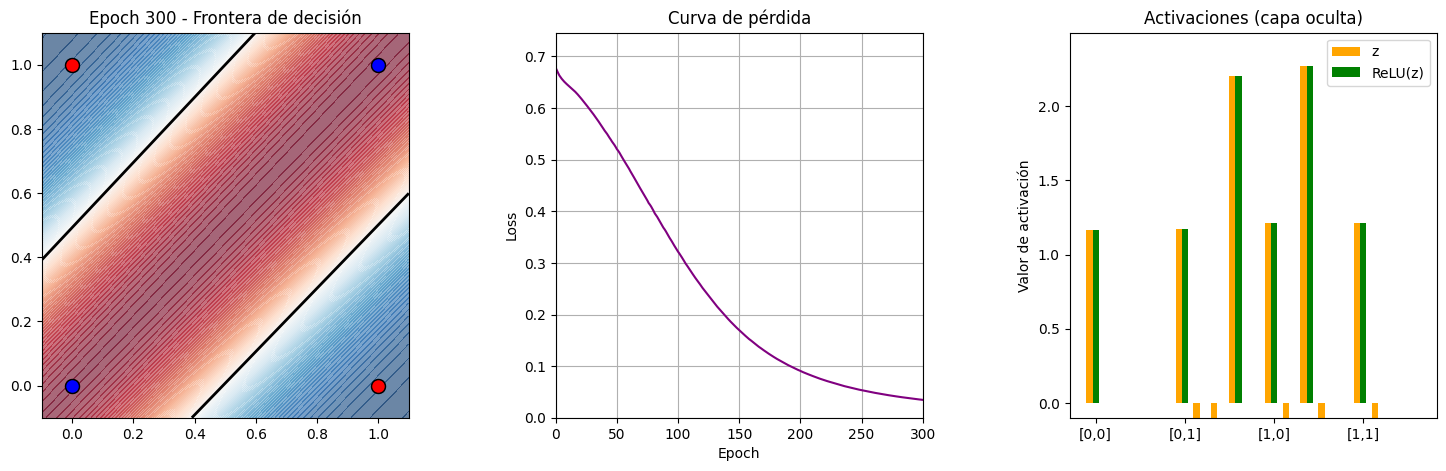

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation, PillowWriter

# Dataset XOR
X = torch.tensor([[0., 0.],
                  [0., 1.],
                  [1., 0.],
                  [1., 1.]])
y = torch.tensor([[0.],
                  [1.],
                  [1.],
                  [0.]])

# Definición de la MLP optimizada
class XORMLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 4),  # Capa oculta
            nn.ReLU(),        # Activación oculta (más rápida que Tanh)
            nn.Linear(4, 1),  # Capa salida
            nn.Sigmoid()      # Activación salida para probabilidad binaria
        )
    def forward(self, x):
        return self.net(x)

model = XORMLP()

# Inicialización Xavier para pesos y ceros para bias
def init_weights(m):
    if isinstance(m, nn.Linear):
        nn.init.xavier_uniform_(m.weight)
        nn.init.zeros_(m.bias)

model.apply(init_weights)

criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Malla para visualizar frontera
x1, x2 = np.meshgrid(np.linspace(-0.1, 1.1, 200),
                     np.linspace(-0.1, 1.1, 200))
grid = torch.tensor(np.c_[x1.ravel(), x2.ravel()], dtype=torch.float32)

# Figura: 3 subplots horizontales
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
plt.subplots_adjust(wspace=0.4)

losses = []

def plot_data(ax):
    X_np = X.numpy()
    y_np = y.numpy().flatten()
    for i in range(len(X_np)):
        ax.scatter(X_np[i, 0], X_np[i, 1],
                   c='red' if y_np[i]==1 else 'blue',
                   s=100, edgecolors='k')

# Animación
def update(epoch):
    # Limpiar frontera y datos
    ax1.cla()
    plot_data(ax1)

    # Entrenamiento
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

    # Predicción en la malla
    model.eval()
    with torch.no_grad():
        preds = model(grid).reshape(x1.shape).numpy()

    # Dibujar frontera de decisión
    ax1.contourf(x1, x2, preds, levels=100, cmap='RdBu', alpha=0.6)
    ax1.contour(x1, x2, preds, levels=[0.5], colors='black', linewidths=2)
    plot_data(ax1)
    ax1.set_title(f"Epoch {epoch+1} - Frontera de decisión")
    ax1.set_xlim(-0.1, 1.1)
    ax1.set_ylim(-0.1, 1.1)

    # Curva de pérdida
    ax2.cla()
    ax2.plot(losses, color='purple')
    ax2.set_title("Curva de pérdida")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Loss")
    ax2.set_xlim(0, epochs)
    ax2.set_ylim(0, max(losses)*1.1)
    ax2.grid(True)

    # Activaciones de la capa oculta
    ax3.cla()
    ax3.set_title("Activaciones (capa oculta)")
    linear = model.net[0]  # Primera capa Linear
    with torch.no_grad():
        z = linear(X)          # Antes de ReLU
        a = torch.relu(z)      # Después de ReLU

    x_labels = ['[0,0]', '[0,1]', '[1,0]', '[1,1]']
    width = 0.35
    num_neurons = z.shape[1]

    for i in range(len(X)):
        x = np.arange(num_neurons)
        ax3.bar(x + i * (num_neurons + 1), z[i].numpy(), width, label='z' if i==0 else "", color='orange')
        ax3.bar(x + i * (num_neurons + 1) + width, a[i].numpy(), width, label='ReLU(z)' if i==0 else "", color='green')

    ax3.set_xticks([i * (num_neurons + 1) + width for i in range(len(X))])
    ax3.set_xticklabels(x_labels)
    ax3.set_ylabel("Valor de activación")
    ax3.set_ylim(-0.1, max(a.max().item(), z.max().item())*1.1)
    ax3.legend()

# Configuración animación
epochs = 300  # Reducido para gif más ligero
interval = 30  # ms entre frames

ani = FuncAnimation(fig, update, frames=epochs, interval=interval, repeat=False)

# Guardar como GIF
ani.save('xor_training_optimized.gif', writer=PillowWriter(fps=20))
plt.show()


# Diagrama de arquitectura de una MLP

```py
net = nn.Sequential(
            nn.Linear(2, 4),  # Capa oculta
            nn.Tanh(),        # Activación oculta
            nn.Linear(4, 1),  # Capa salida
            nn.Sigmoid()      # Activación salida
        )
```

In [ ]:
pip install torchviz graphviz


In [ ]:
from torchviz import make_dot
import torch

# Usa tu clase previamente definida
model = XORMLP()
X_dummy = torch.randn(1, 2)  # Entrada ficticia

# Generar salida
output = model(X_dummy)

# Crear gráfico
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("xor_mlp_architecture", format="png")  # Genera archivo PNG


'xor_mlp_architecture.png'

In [ ]:
print(model)


XORMLP(
  (net): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=1, bias=True)
    (3): Sigmoid()
  )
)


In [ ]:
from torchviz import make_dot

model = XORMLP()
X_dummy = torch.randn(1, 2)  # entrada ficticia
output = model(X_dummy)

dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("xor_mlp_graph", format="png")  # crea xor_mlp_graph.png


'xor_mlp_graph.png'

In [ ]:
pip install onnx


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 78.6 MB/s eta 0:00:00


In [ ]:
torch.onnx.export(model, X_dummy, "xor.onnx")